# Importing libraries

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [3]:
# Read dataset
df = pd.read_csv("./dataset.csv")
df.head()

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018


In [69]:
df.shape

(3504, 17)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Price                  3504 non-null   int64 
 1   Street                 3504 non-null   object
 2   Area                   3504 non-null   object
 3   City                   3503 non-null   object
 4   Type                   3504 non-null   object
 5   Bedrooms               3504 non-null   int64 
 6   Bathrooms              3504 non-null   int64 
 7   Size(Sq. Ft.)          3504 non-null   int64 
 8   Parking Space          3504 non-null   object
 9   Balcony or Terrace     3504 non-null   object
 10  Double Glazed Windows  3504 non-null   object
 11  Maintenance Staff      3504 non-null   object
 12  View                   3504 non-null   object
 13  Pet Policy             3504 non-null   object
 14  Lobby in Building      3504 non-null   object
 15  Family or Bachelor   

# EDA

In [71]:
# Check data types
df.dtypes

Price                     int64
Street                   object
Area                     object
City                     object
Type                     object
Bedrooms                  int64
Bathrooms                 int64
Size(Sq. Ft.)             int64
Parking Space            object
Balcony or Terrace       object
Double Glazed Windows    object
Maintenance Staff        object
View                     object
Pet Policy               object
Lobby in Building        object
Family or Bachelor       object
Rent Year                 int64
dtype: object

In [72]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Price', 'Bedrooms', 'Bathrooms', 'Size(Sq. Ft.)', 'Rent Year'], object: ['Street', 'Area', 'City', 'Type', 'Parking Space', 'Balcony or Terrace', 'Double Glazed Windows', 'Maintenance Staff', 'View', 'Pet Policy', 'Lobby in Building', 'Family or Bachelor']}

In [73]:
# Check unique values
df.nunique()

Price                    137
Street                   304
Area                      51
City                       4
Type                       4
Bedrooms                   5
Bathrooms                  6
Size(Sq. Ft.)            269
Parking Space              2
Balcony or Terrace         2
Double Glazed Windows      2
Maintenance Staff          2
View                       5
Pet Policy                 2
Lobby in Building          2
Family or Bachelor         2
Rent Year                  3
dtype: int64

In [74]:
# Change the categorical type to categorical variables
df['Rent Year'] = df['Rent Year'].astype('object')
df.dtypes

Price                     int64
Street                   object
Area                     object
City                     object
Type                     object
Bedrooms                  int64
Bathrooms                 int64
Size(Sq. Ft.)             int64
Parking Space            object
Balcony or Terrace       object
Double Glazed Windows    object
Maintenance Staff        object
View                     object
Pet Policy               object
Lobby in Building        object
Family or Bachelor       object
Rent Year                object
dtype: object

- See the value types of each column to analyze the dataset features

In [75]:
df['City'].unique()

array([' Dhaka', ' Badda', nan, ' Malibagh', ' Banasree'], dtype=object)

In [80]:
df['City'].value_counts()

View
North    1215
South    1015
West      902
East      308
west        1
Name: count, dtype: int64

In [18]:
# Deleting rows that belong to city other than Dhaka, because it is the city with the highest number of houses
# Deleting house types with wrong values
# Replacing house view misspelled values
df = df.drop(df[df['City'] != ' Dhaka'].index)
df = df.drop(df[df['Type'] == 'd'].index)
df['View'].replace(['west'], 'West', inplace = True)

In [5]:
# Checking missing values
df.isnull().sum()

Price                    0
Street                   0
Area                     0
City                     0
Type                     0
Bedrooms                 0
Bathrooms                0
Size(Sq. Ft.)            0
Parking Space            0
Balcony or Terrace       0
Double Glazed Windows    0
Maintenance Staff        0
View                     0
Pet Policy               0
Lobby in Building        0
Family or Bachelor       0
Rent Year                0
dtype: int64

In [54]:
# Labeling for better interpretation
df['Rent Year'].value_counts()

Rent Year
2016    1143
2018    1088
2017    1085
Name: count, dtype: int64

In [55]:
df['City'] = df['City'].replace({ 1: " Dhaka" })
df['Type'] = df['Type'].replace({ 1: "Apartment", 2: "Room", 3: "Duplex" })
df['Parking Space'] = df['Parking Space'].replace({ 1: " Yes", 0: "No" })
df['Balcony or Terrace'] = df['Balcony or Terrace'].replace({ 1: " Yes", 0: "No" })
df['Double Glazed Windows'] = df['Double Glazed Windows'].replace({ 1: " Yes", 0: "No" })
df['Maintenance Staff'] = df['Maintenance Staff'].replace({ 1: " Yes", 0: "No" })
df['View'] = df['View'].replace({ 1: " Yes", 0: "No" })
df['Pet Policy'] = df['Pet Policy'].replace({ 1: " Yes", 0: "No" })
df['Lobby in Building'] = df['Lobby in Building'].replace({ 1: " Yes", 0: "No" })
df['Family or Bachelor'] = df['Family or Bachelor'].replace({ 1: " Yes", 0: "No" })
df['Rent Year'] = df['Rent Year'].replace({ 0: " 2016", 1: "2017", 2: "2018" })
df

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,10500,Section 11,Mirpur,Dhaka,Room,2,2,650,No,Yes,Yes,No,North,No,No,Yes,2018
3500,25000,Block G,Bashundhara R/A,Dhaka,Apartment,3,3,1500,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
3501,14000,Shahinbag,Tejgaon,Dhaka,Apartment,2,1,600,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
3502,40000,Block F,Lalmatia,Dhaka,Apartment,3,3,1650,Yes,Yes,Yes,Yes,South,No,Yes,Yes,2016


In [44]:
# Check basic stats
df.describe()

,Price,Bedrooms,Bathrooms,Size(Sq. Ft.),Rent Year
count,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000
mean,18579.560615,2.444210,2.266285,1044.093185,2016.983414
std,10488.157978,0.667423,0.876348,426.194396,0.820199
min,4000.000000,1.000000,1.000000,250.000000,2016.000000
25%,12000.000000,2.000000,2.000000,700.000000,2016.000000
50%,16000.000000,2.000000,2.000000,905.000000,2017.000000
75%,22000.000000,3.000000,3.000000,1300.000000,2018.000000
max,70000.000000,4.000000,5.000000,2700.000000,2018.000000


In [9]:
# Check for missing values  and replace them
df.fillna(method='ffill', inplace=True)
df

/var/folders/9r/wnc9gnyj61n5rkt3c6yzg16c0000gn/T/ipykernel_17316/4055069597.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,10500,Section 11,Mirpur,Dhaka,Room,2,2,650,No,Yes,Yes,No,North,No,No,Yes,2018
3500,25000,Block G,Bashundhara R/A,Dhaka,Apartment,3,3,1500,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
3501,14000,Shahinbag,Tejgaon,Dhaka,Apartment,2,1,600,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
3502,40000,Block F,Lalmatia,Dhaka,Apartment,3,3,1650,Yes,Yes,Yes,Yes,South,No,Yes,Yes,2016


In [56]:
# Check for duplicate values
df[df.duplicated()]

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year


In [59]:
df.drop_duplicates(inplace=True)
df

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,10500,Section 11,Mirpur,Dhaka,Room,2,2,650,No,Yes,Yes,No,North,No,No,Yes,2018
3500,25000,Block G,Bashundhara R/A,Dhaka,Apartment,3,3,1500,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
3501,14000,Shahinbag,Tejgaon,Dhaka,Apartment,2,1,600,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
3502,40000,Block F,Lalmatia,Dhaka,Apartment,3,3,1650,Yes,Yes,Yes,Yes,South,No,Yes,Yes,2016


In [91]:
# Statistics summary
df.describe()

,Price,Bedrooms,Bathrooms,Size(Sq. Ft.),Rent Year
count,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000
mean,20397.011160,2.476358,2.308076,1091.709838,2016.985022
std,16698.382457,0.696083,0.912092,549.611193,0.820248
min,4000.000000,1.000000,1.000000,250.000000,2016.000000
25%,12000.000000,2.000000,2.000000,720.000000,2016.000000
50%,16000.000000,2.000000,2.000000,950.000000,2017.000000
75%,23000.000000,3.000000,3.000000,1305.000000,2018.000000
max,300000.000000,5.000000,6.000000,11700.000000,2018.000000


In [92]:
df.isnull().sum()

Price                    0
Street                   0
Area                     0
City                     0
Type                     0
Bedrooms                 0
Bathrooms                0
Size(Sq. Ft.)            0
Parking Space            0
Balcony or Terrace       0
Double Glazed Windows    0
Maintenance Staff        0
View                     0
Pet Policy               0
Lobby in Building        0
Family or Bachelor       0
Rent Year                0
dtype: int64

In [13]:
df.shape

(3405, 17)

/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

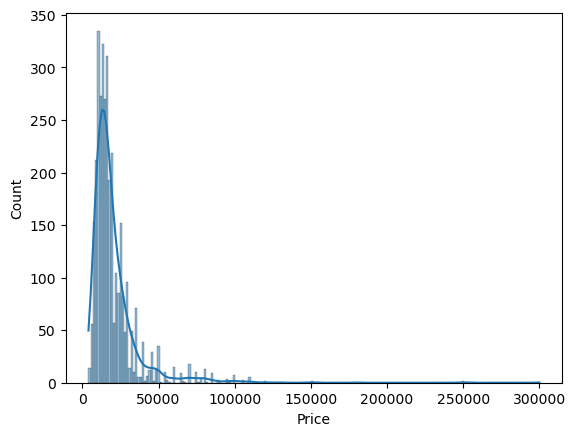

In [14]:
sns.histplot(df['Price'], kde=True)

In [15]:
# Check for outliers and how to remove them
from scipy.stats import zscore
numeric_columns = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_columns]))
outliers_mask = (z_scores < 3).all(axis=1)  # Adjust the threshold as needed (e.g., 3)
df = df[outliers_mask]
df

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,10500,Section 11,Mirpur,Dhaka,Room,2,2,650,No,Yes,Yes,No,North,No,No,Yes,2018
3500,25000,Block G,Bashundhara R/A,Dhaka,Apartment,3,3,1500,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
3501,14000,Shahinbag,Tejgaon,Dhaka,Apartment,2,1,600,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
3502,40000,Block F,Lalmatia,Dhaka,Apartment,3,3,1650,Yes,Yes,Yes,Yes,South,No,Yes,Yes,2016


In [16]:
df['Price'].describe()

count     3316.000000
mean     18579.560615
std      10488.157978
min       4000.000000
25%      12000.000000
50%      16000.000000
75%      22000.000000
max      70000.000000
Name: Price, dtype: float64

/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

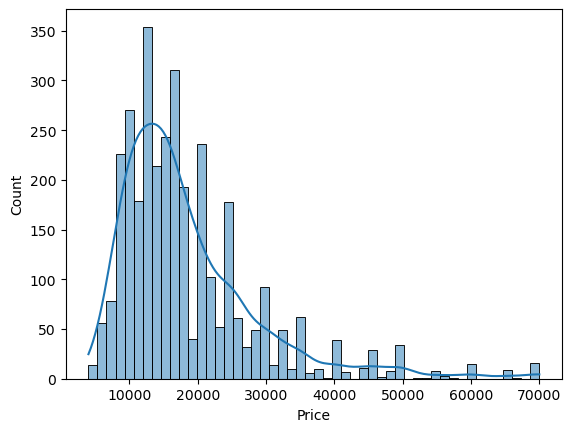

In [42]:
sns.histplot(df['Price'], kde=True)

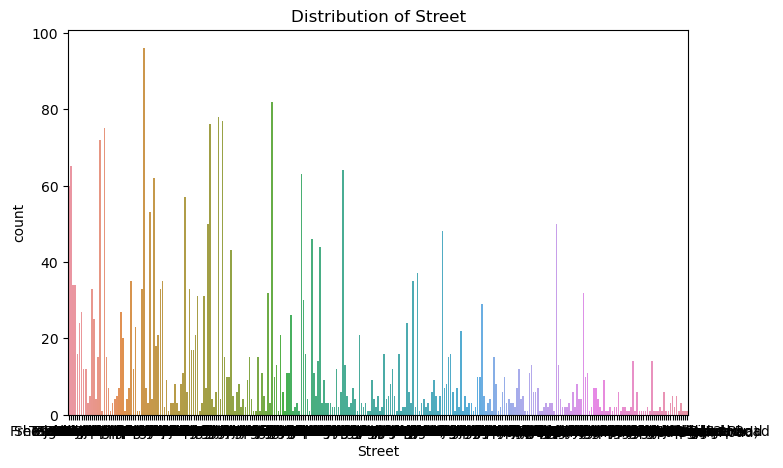

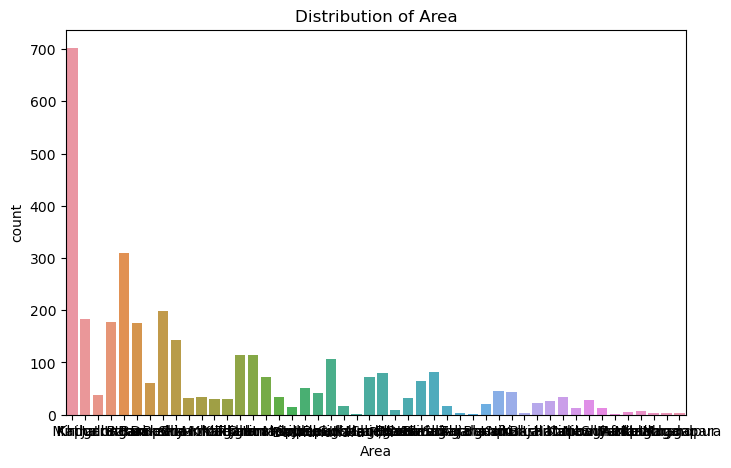

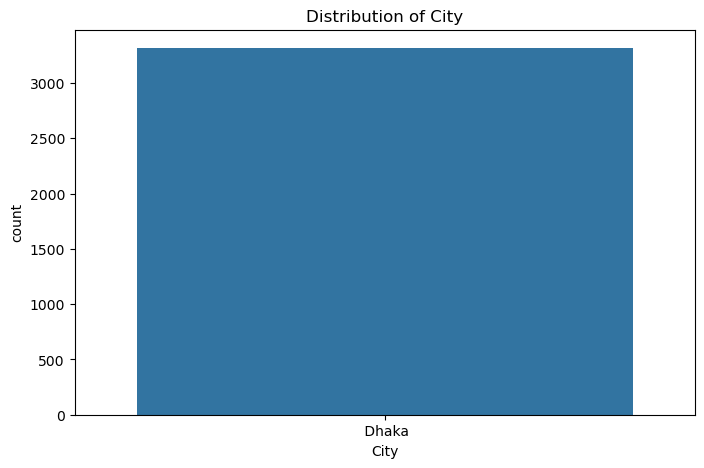

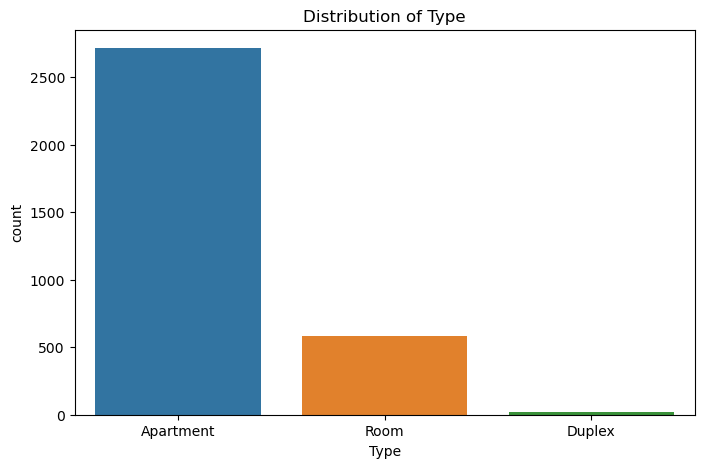

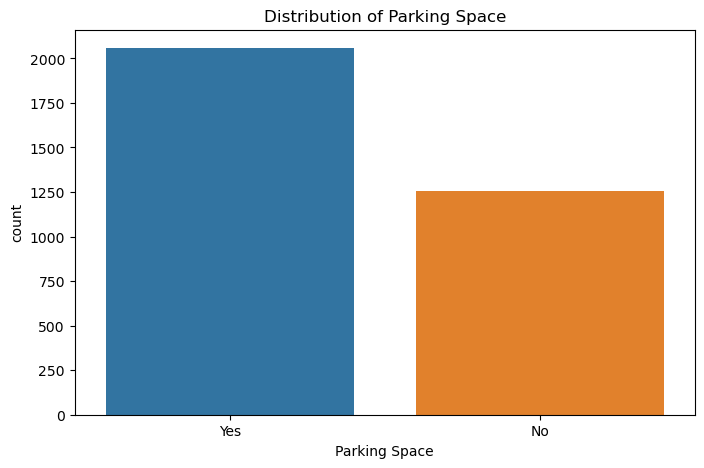

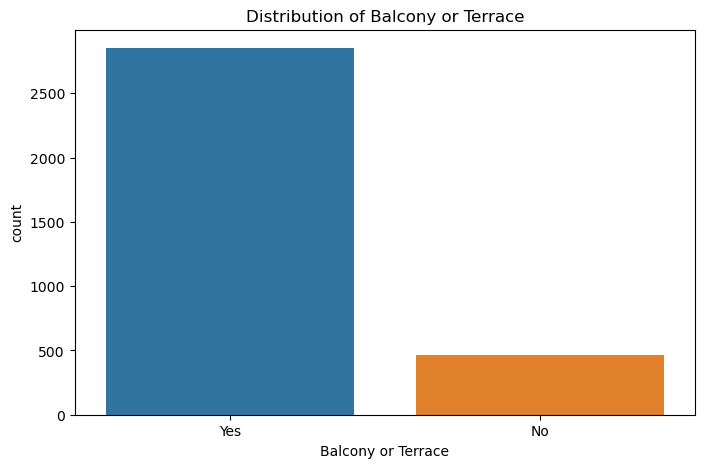

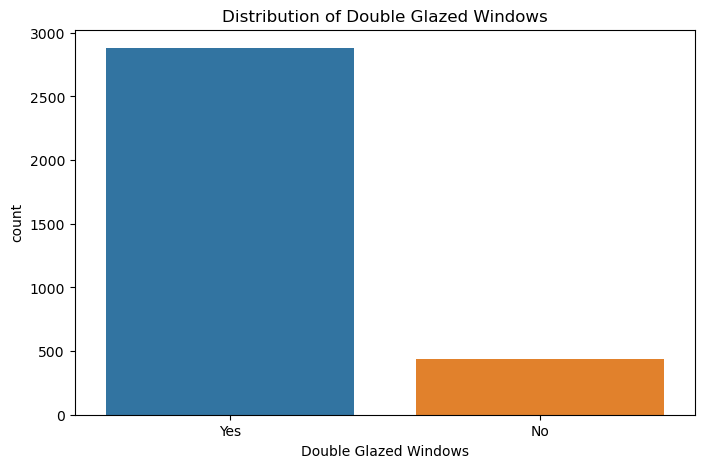

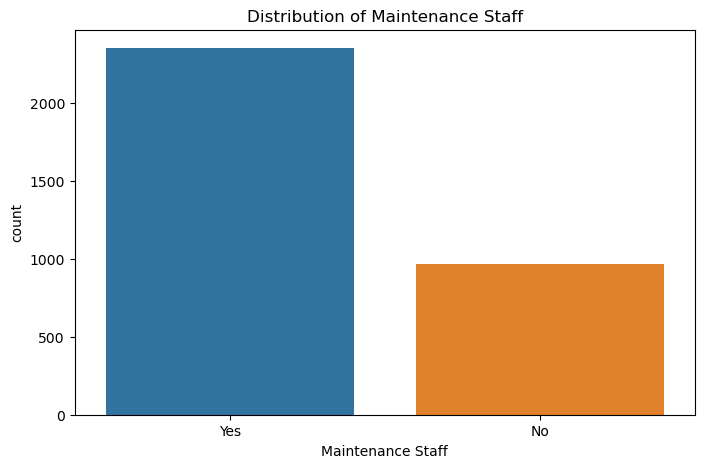

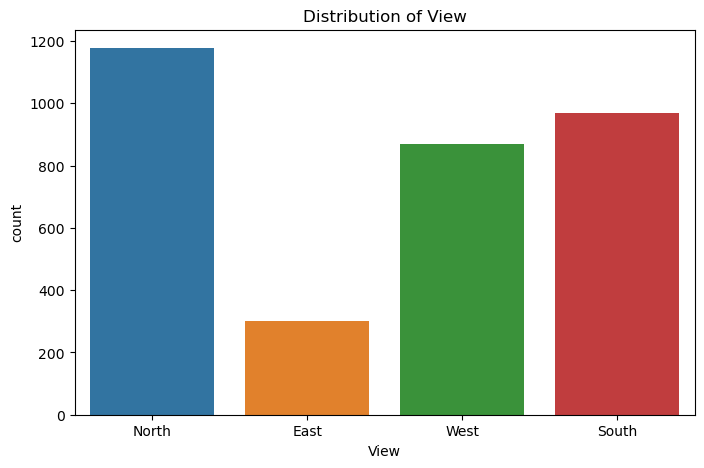

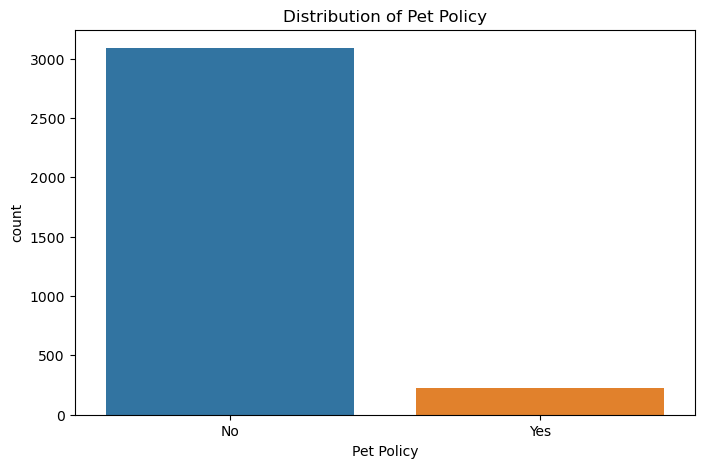

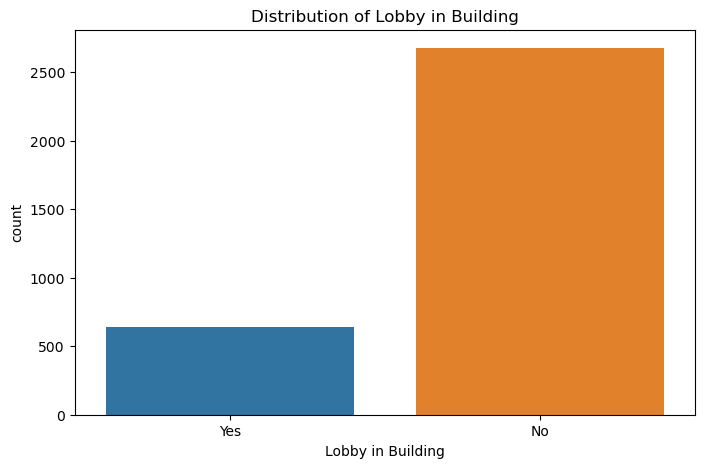

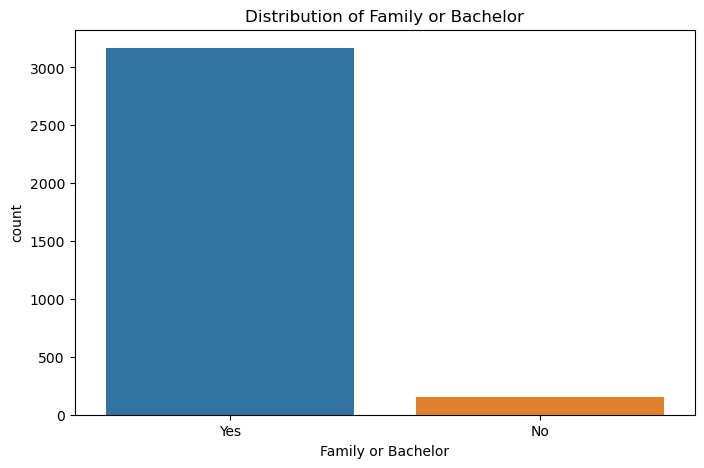

In [20]:
# Categorical variable distribution
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

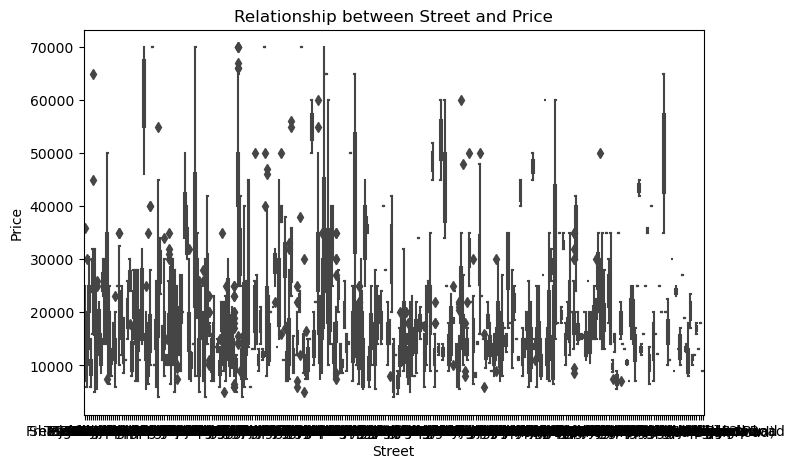

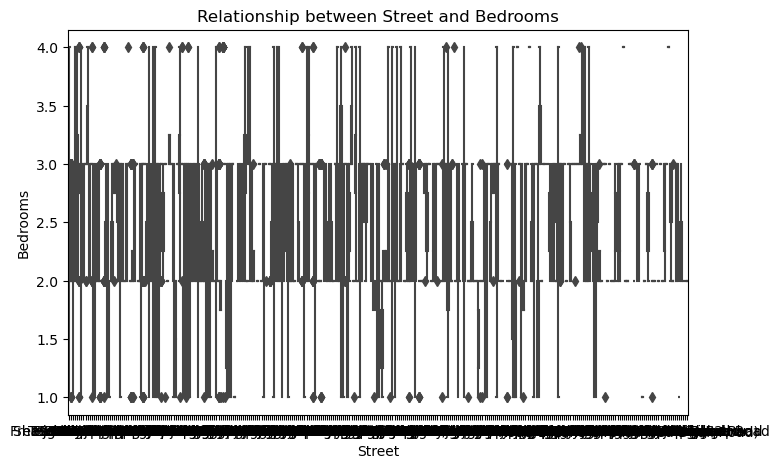

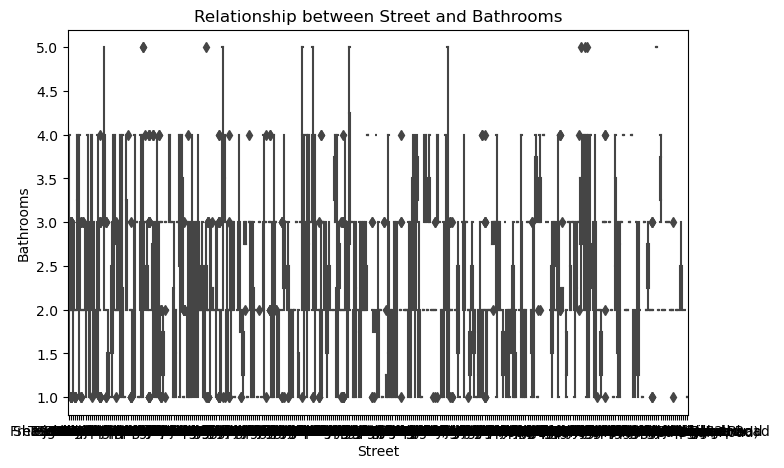

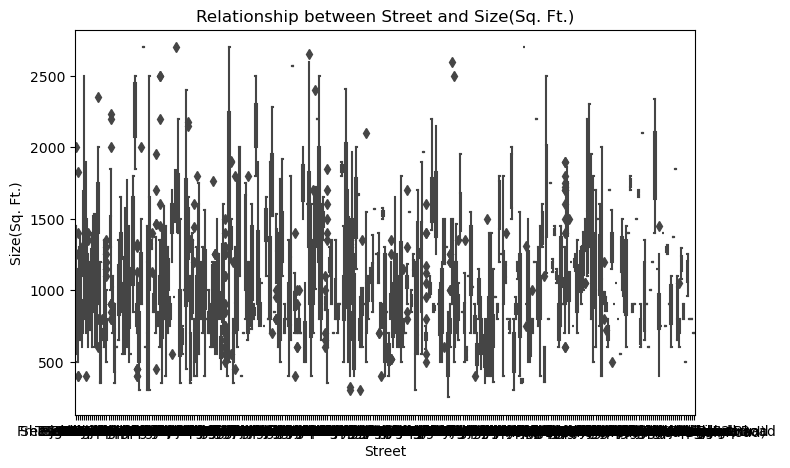

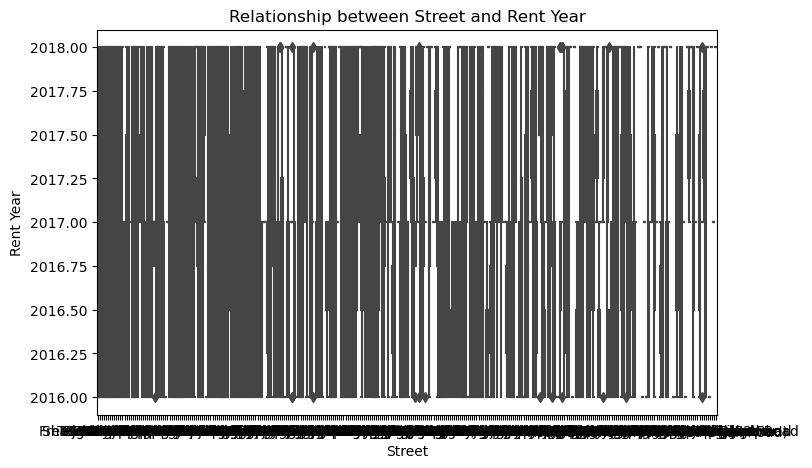

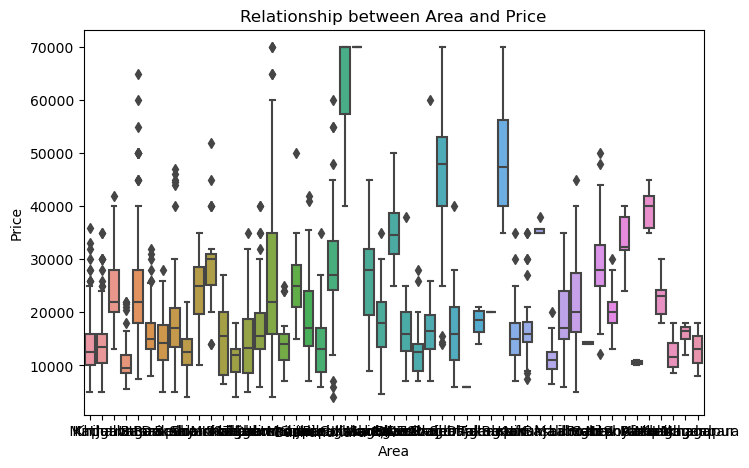

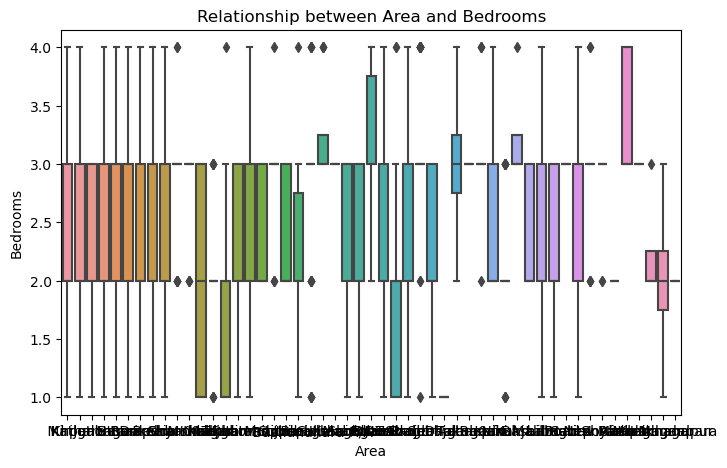

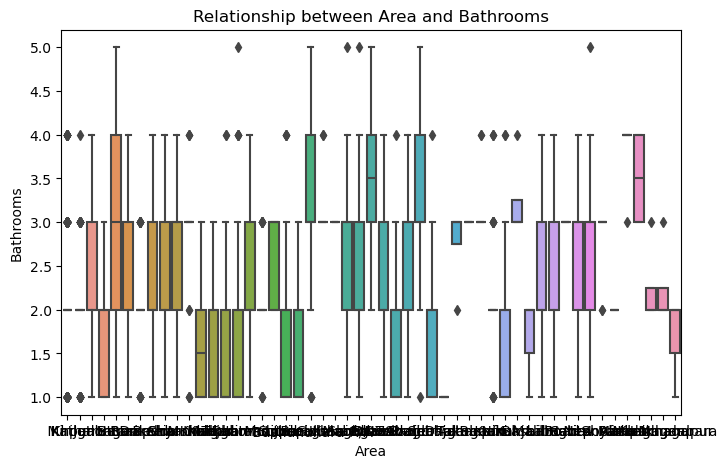

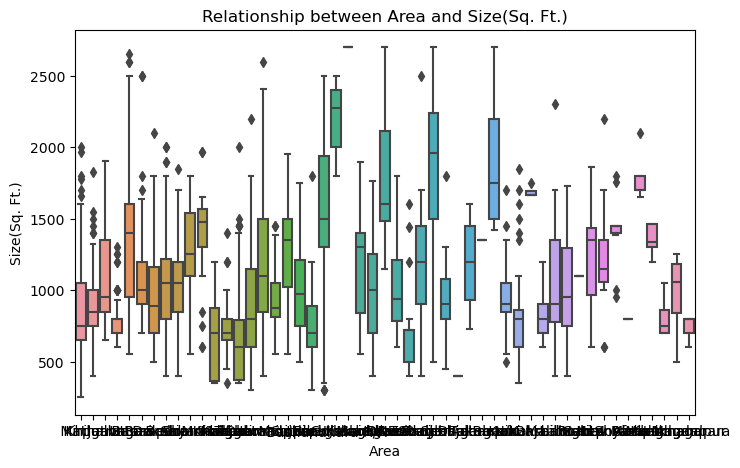

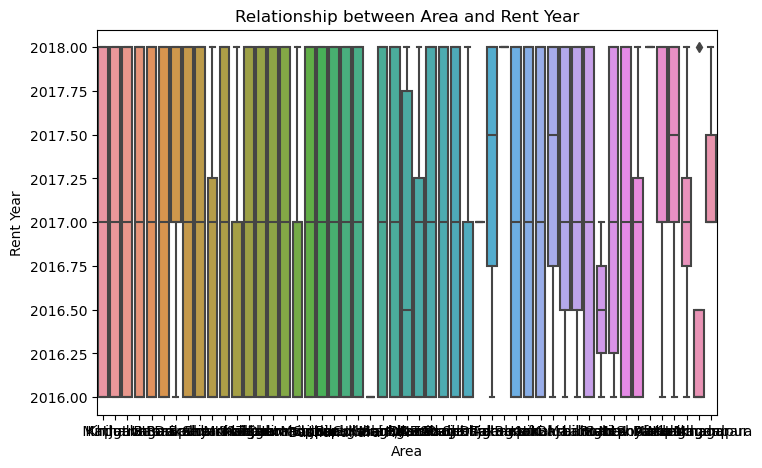

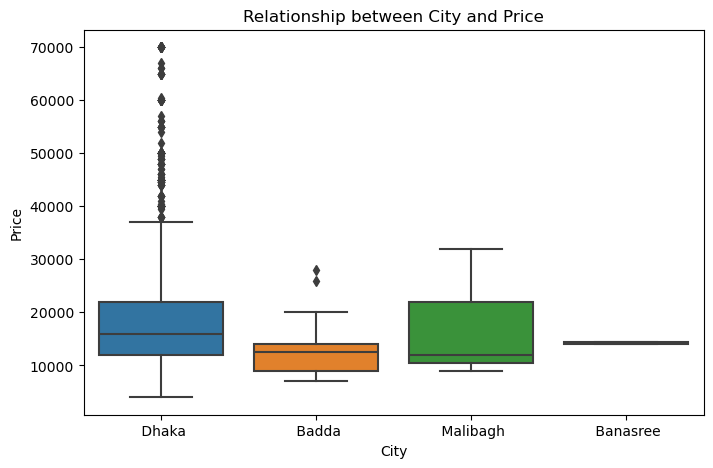

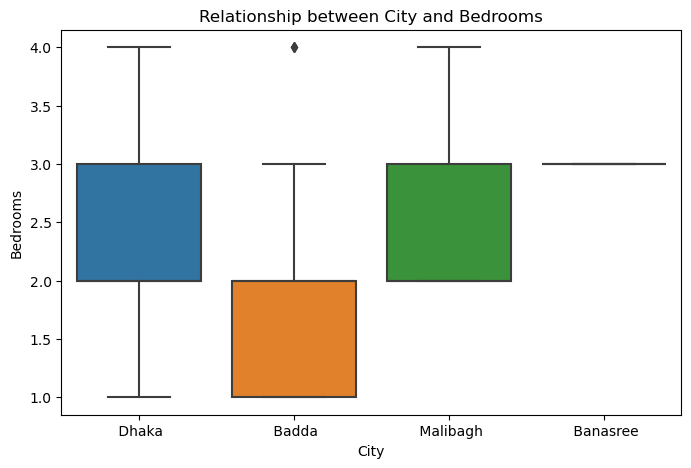

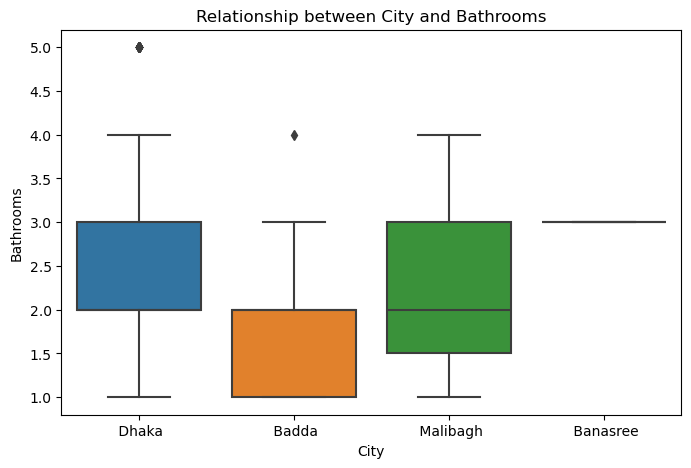

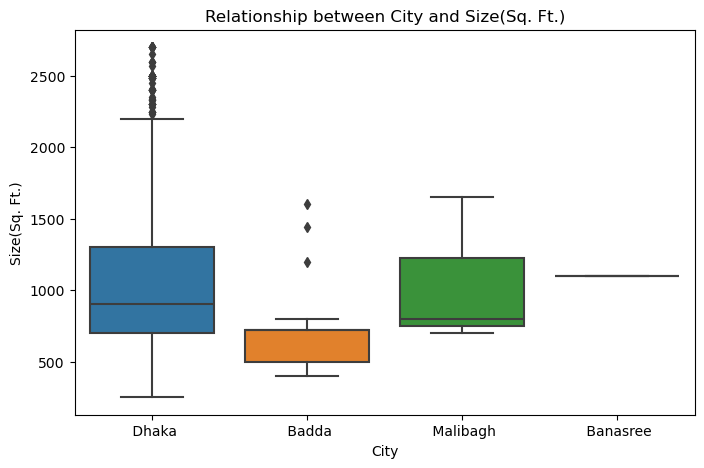

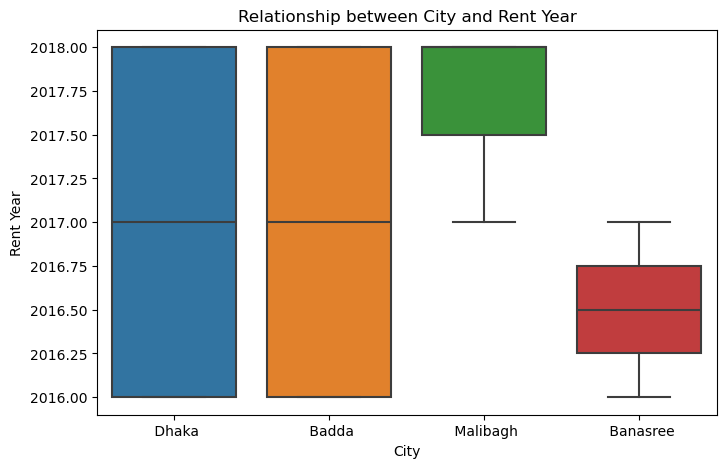

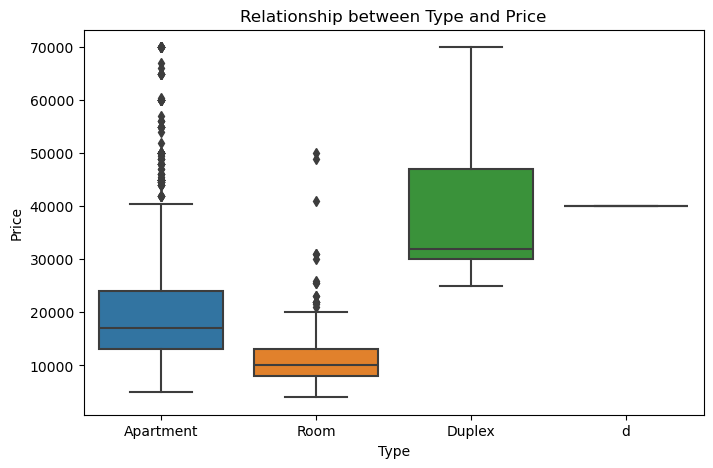

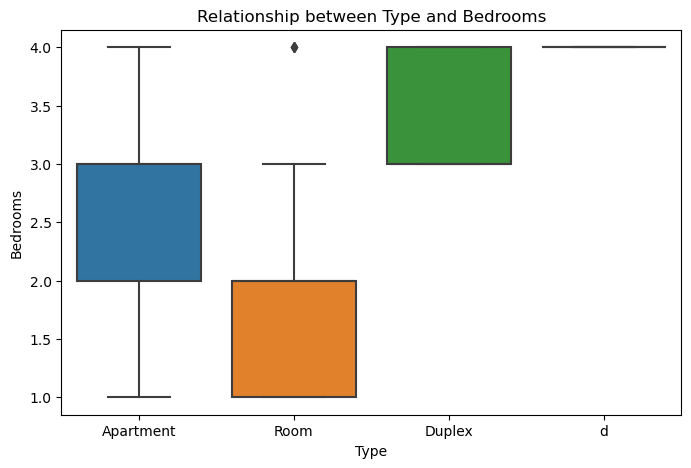

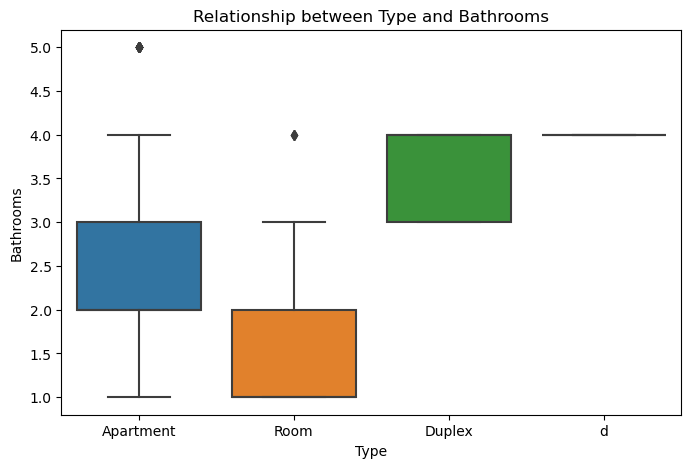

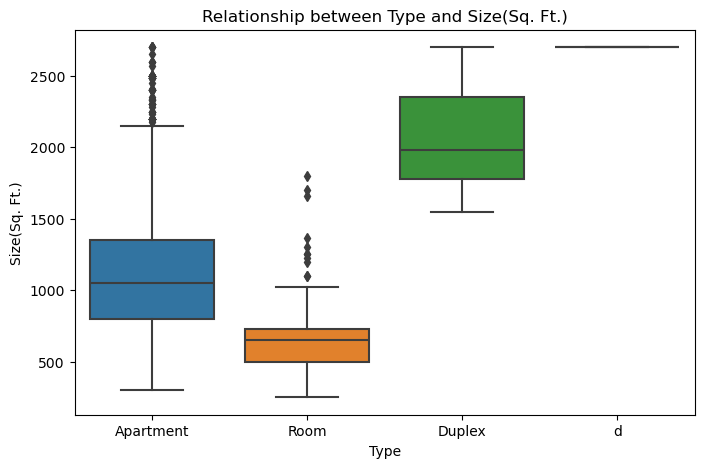

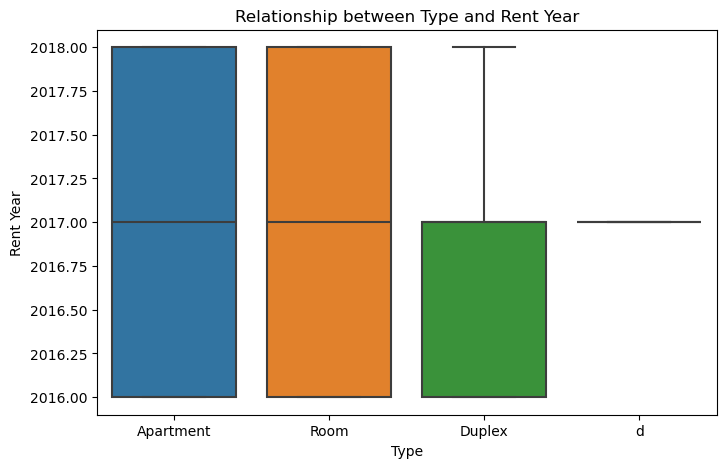

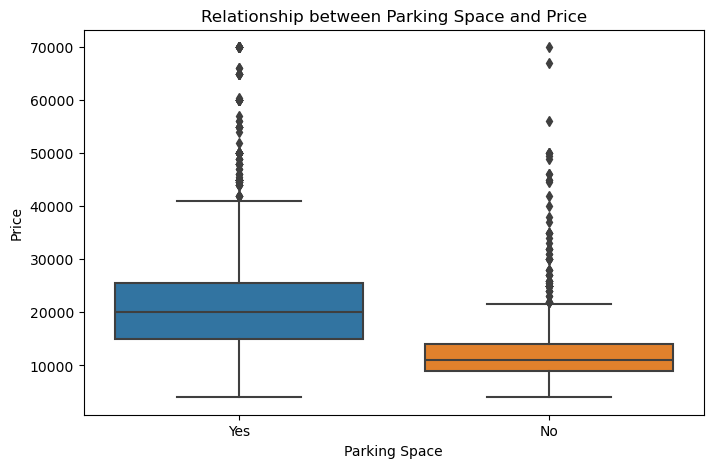

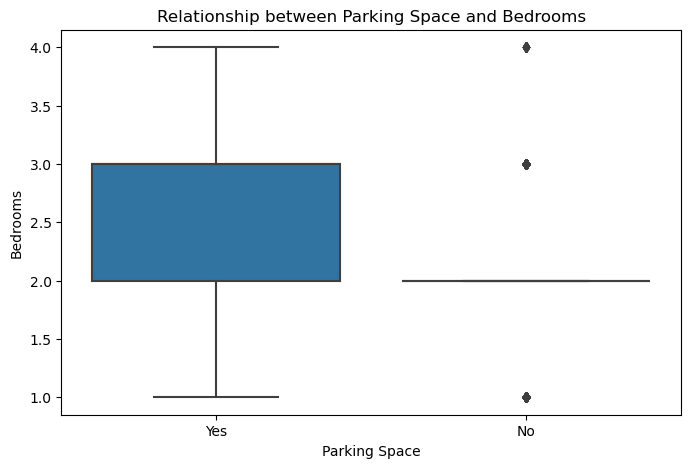

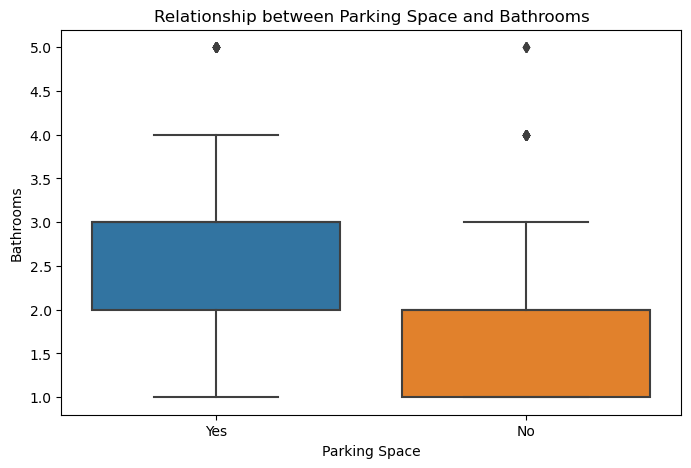

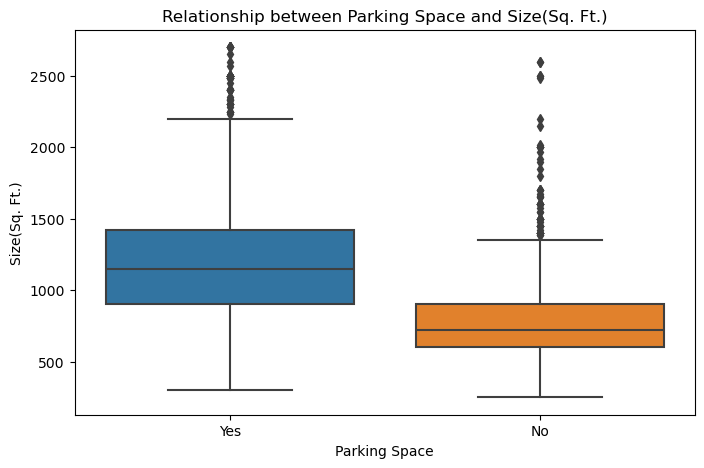

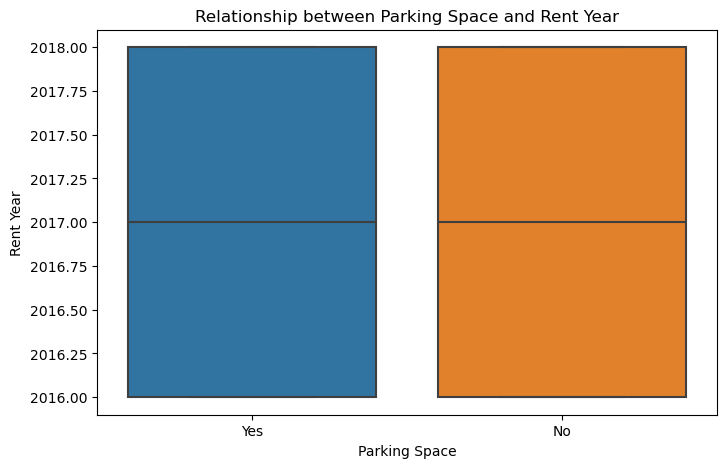

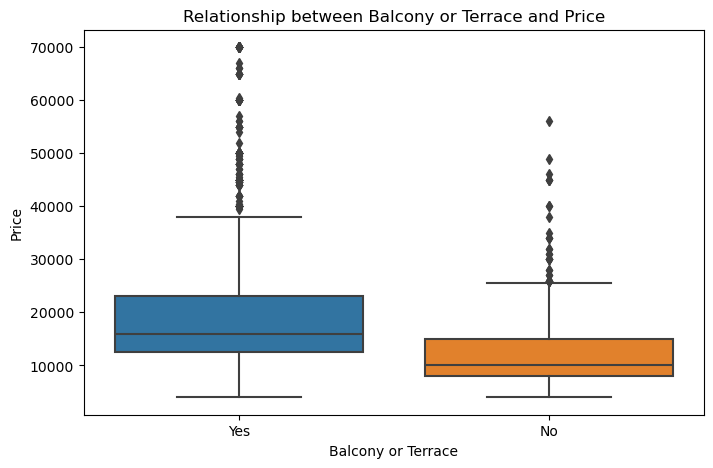

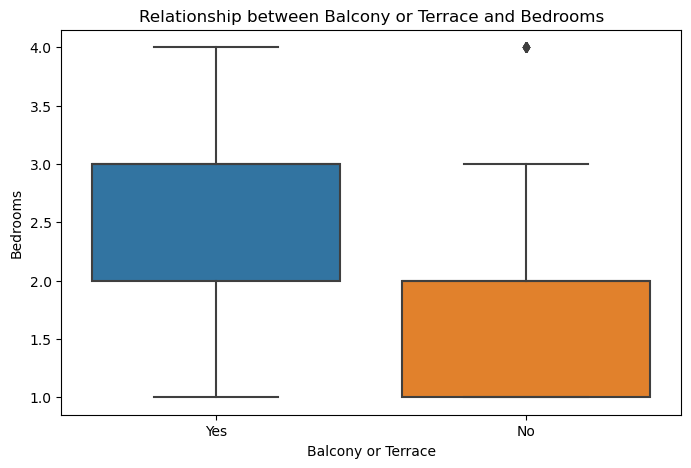

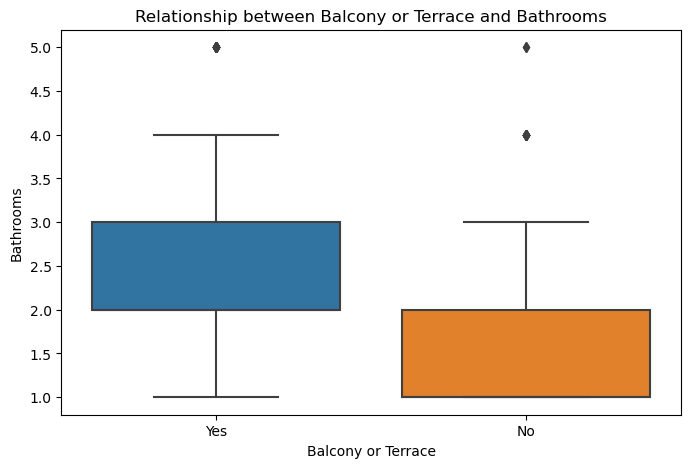

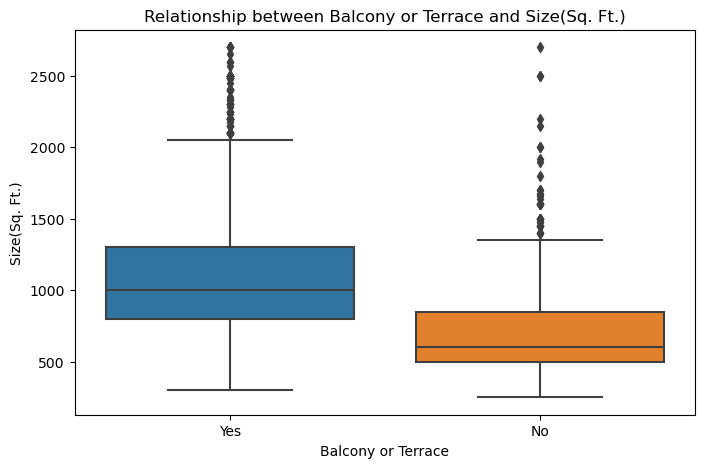

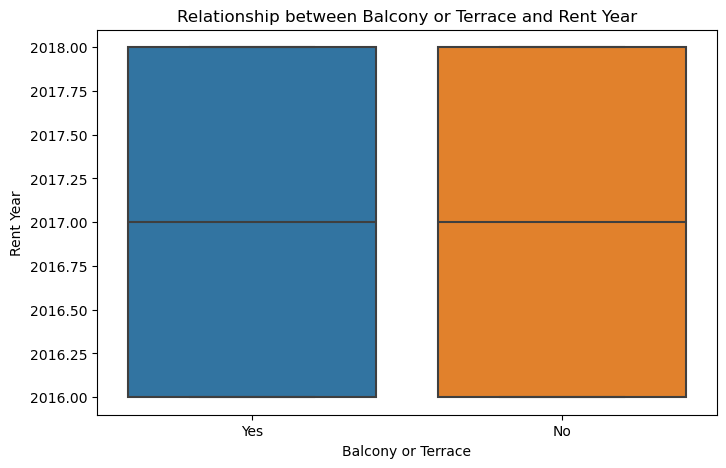

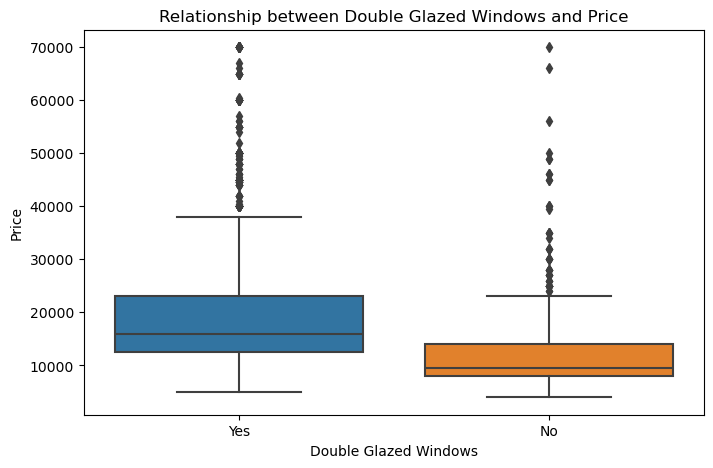

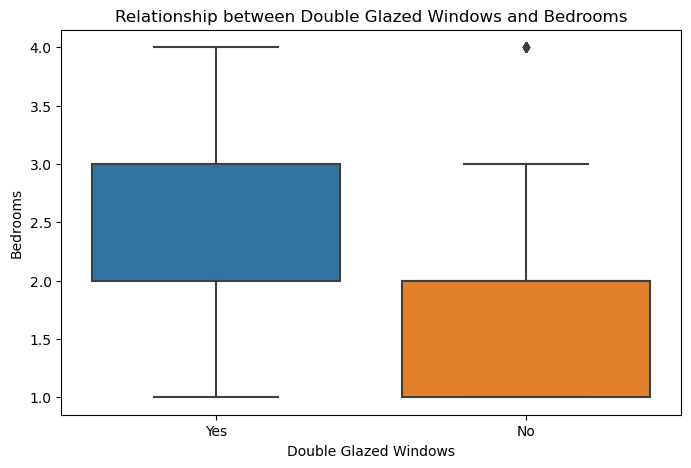

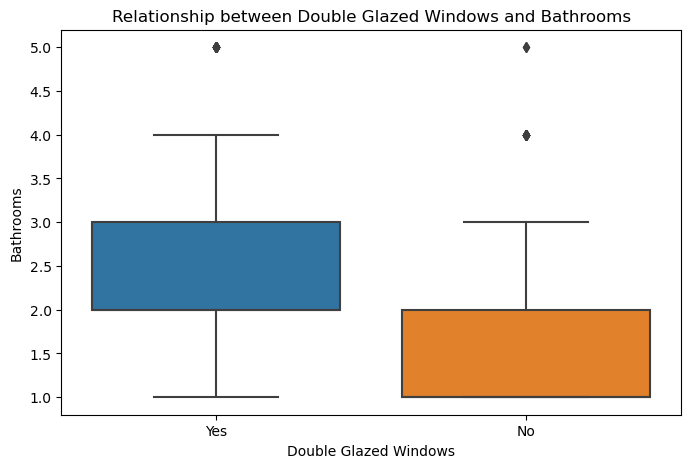

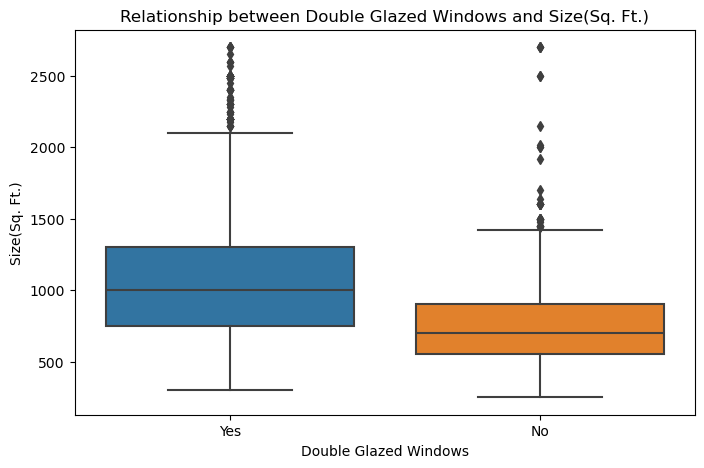

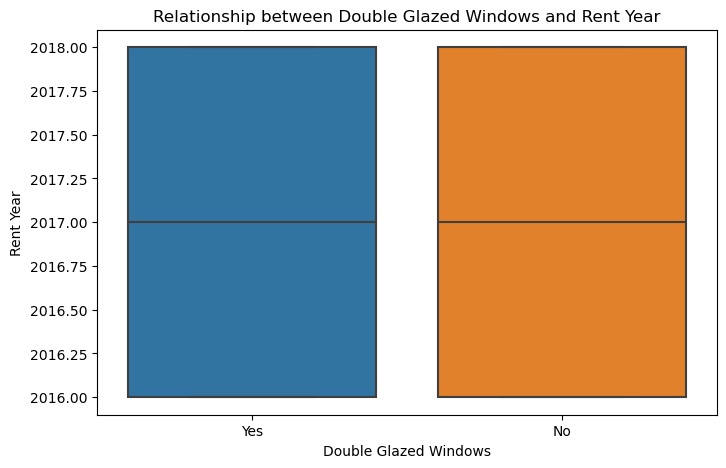

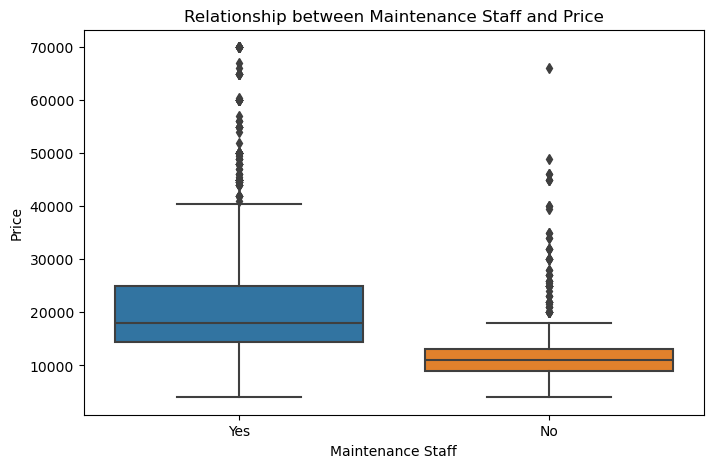

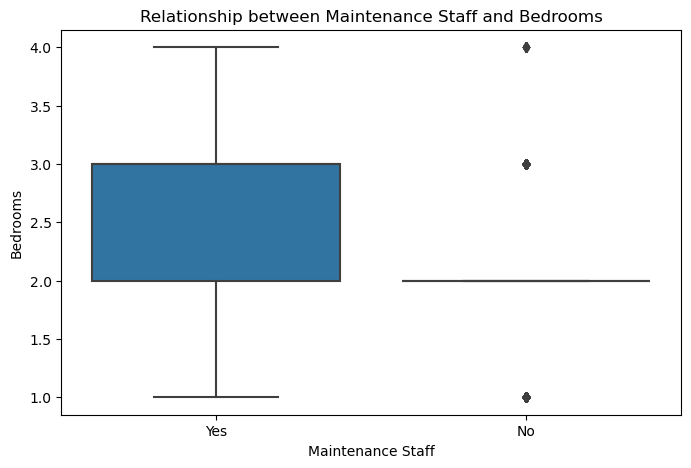

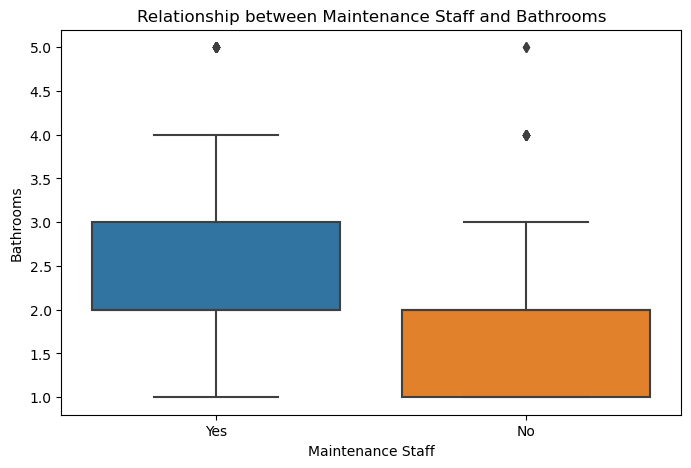

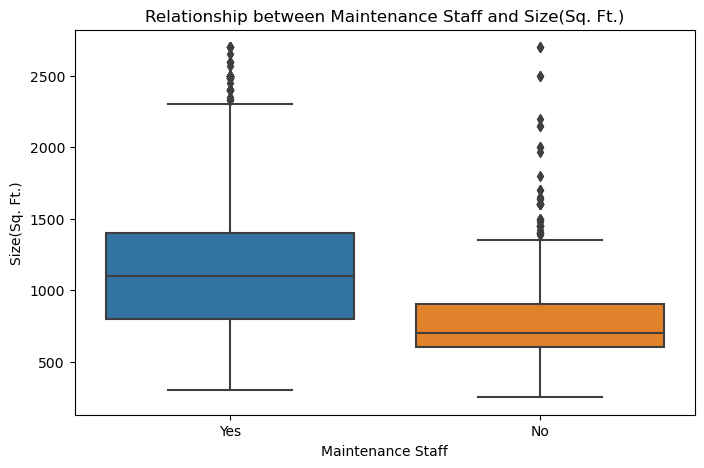

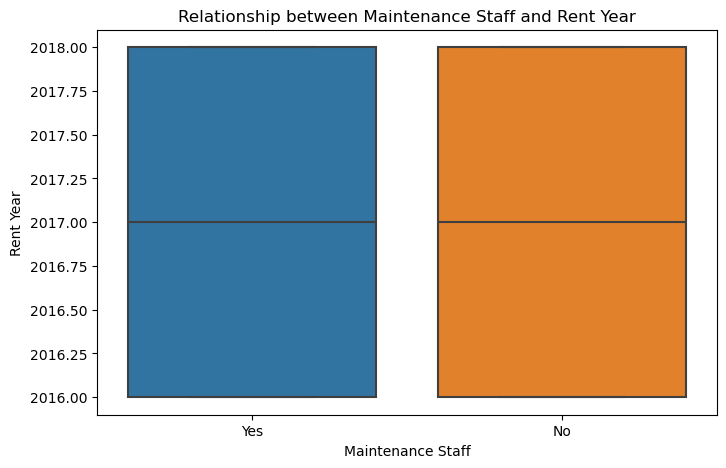

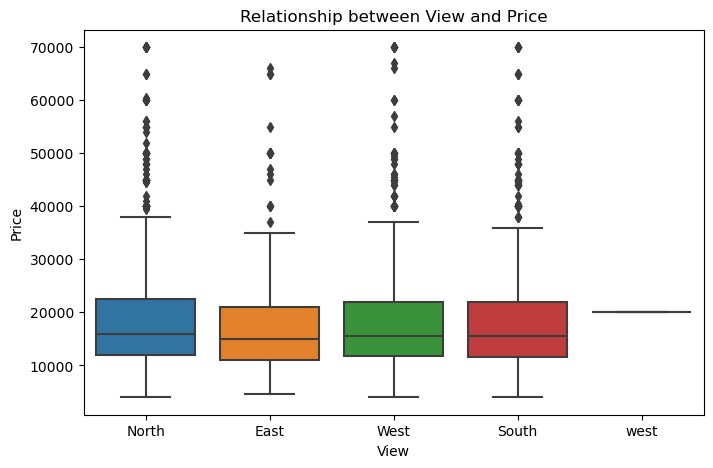

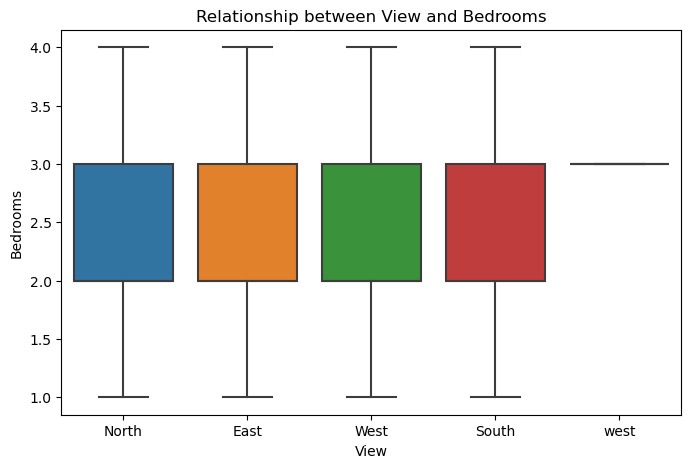

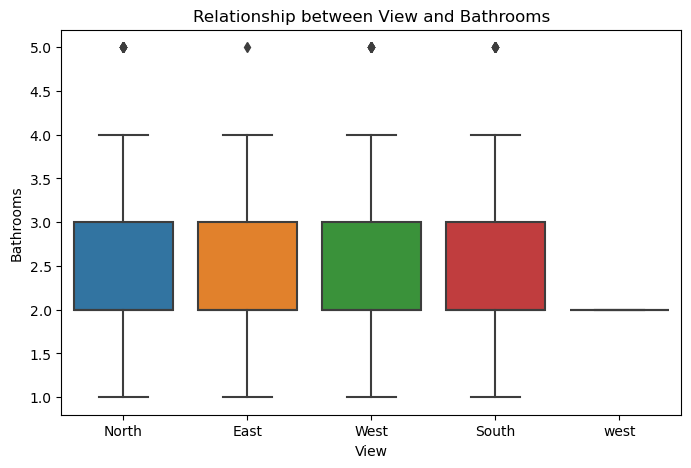

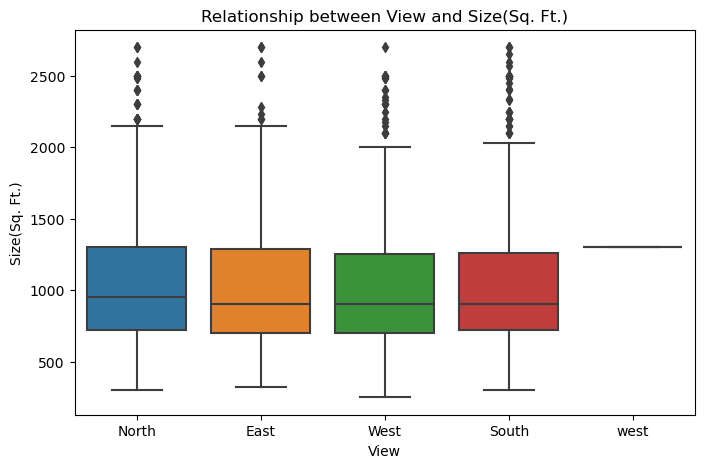

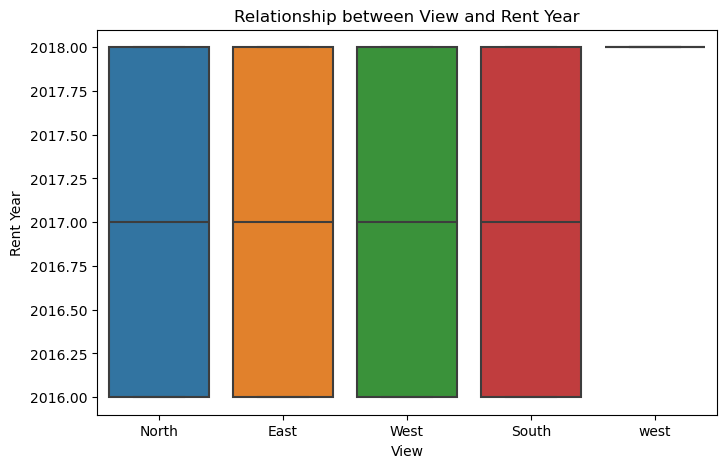

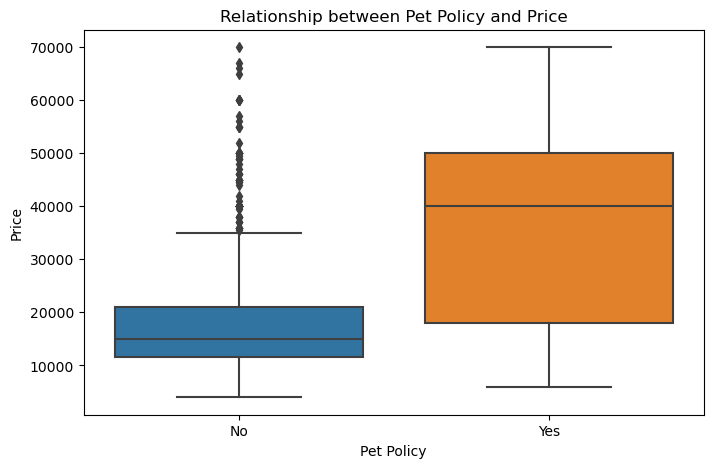

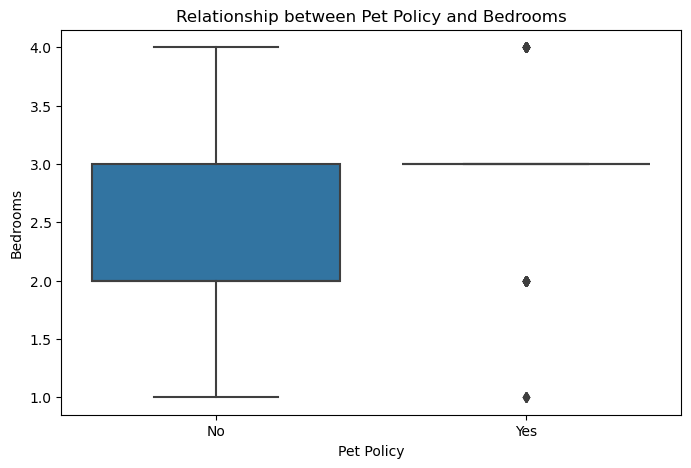

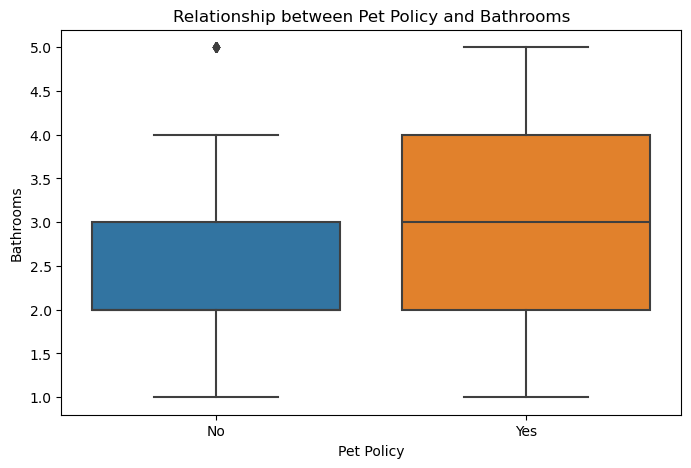

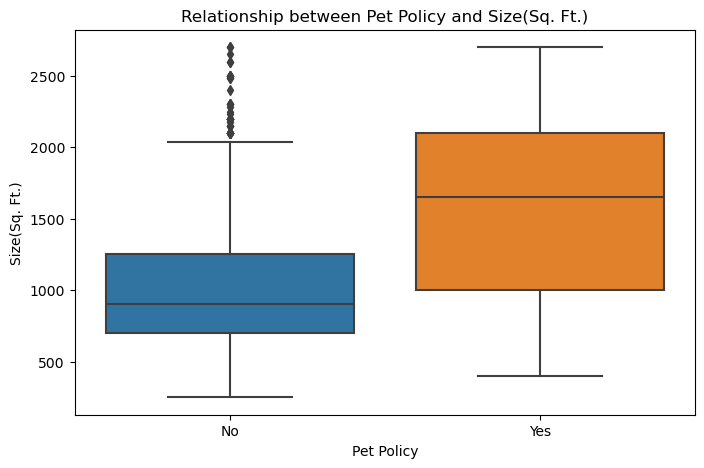

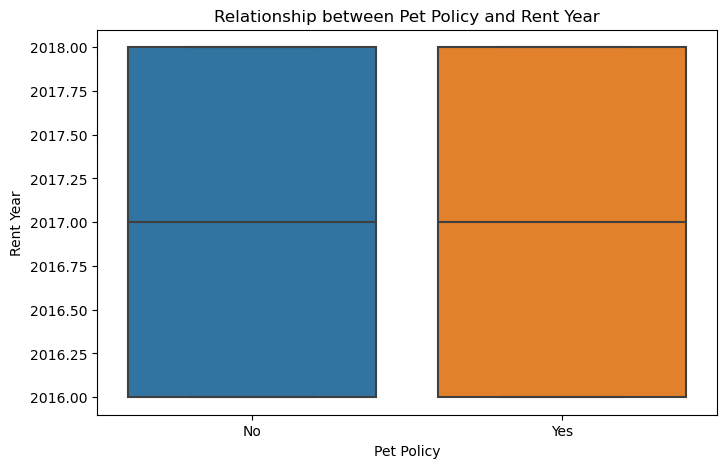

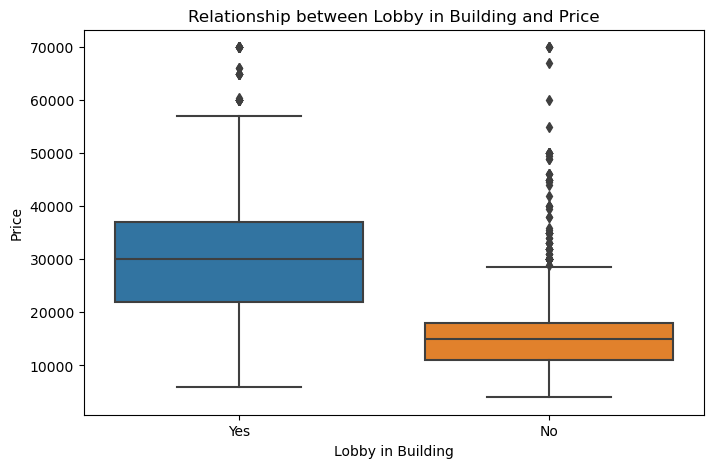

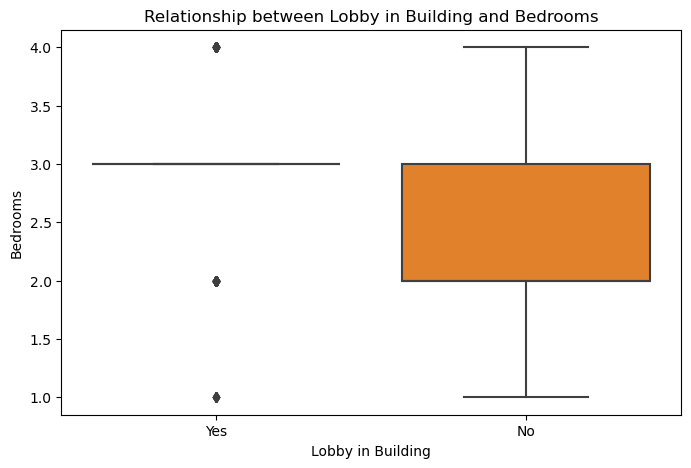

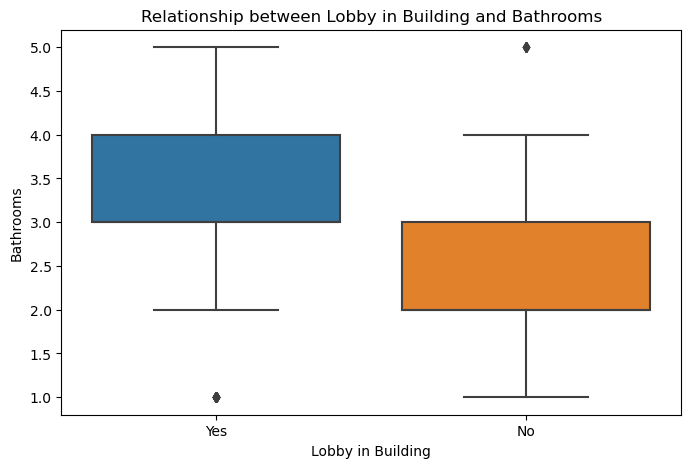

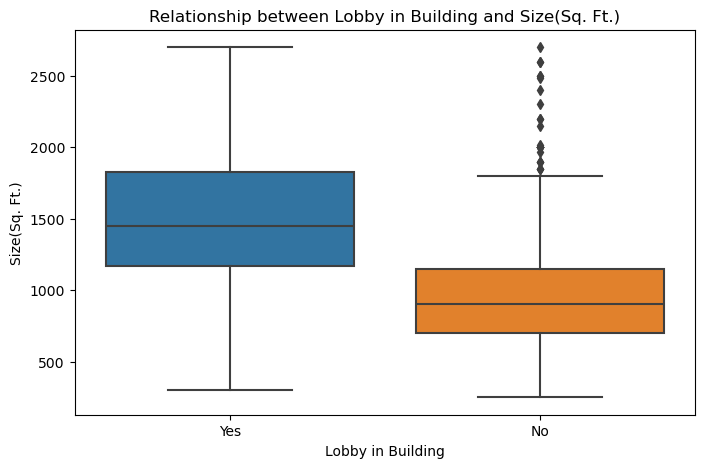

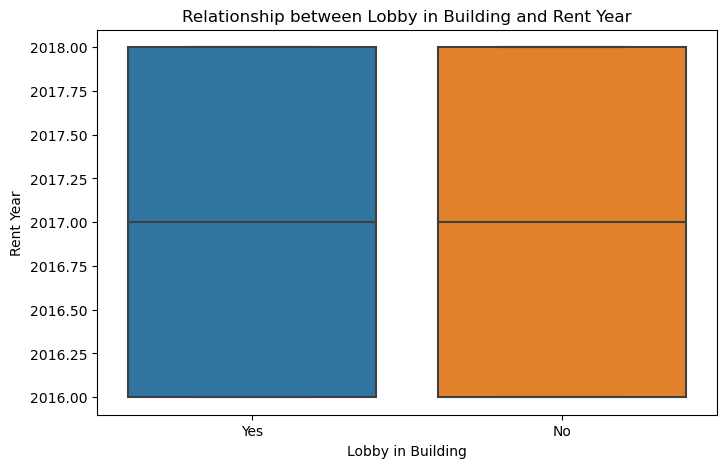

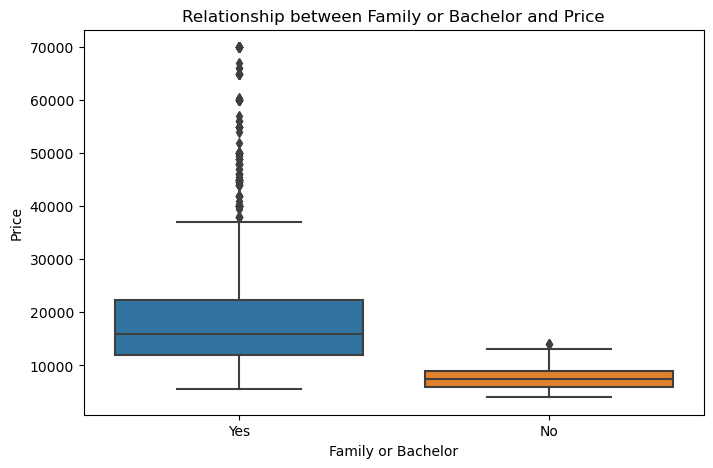

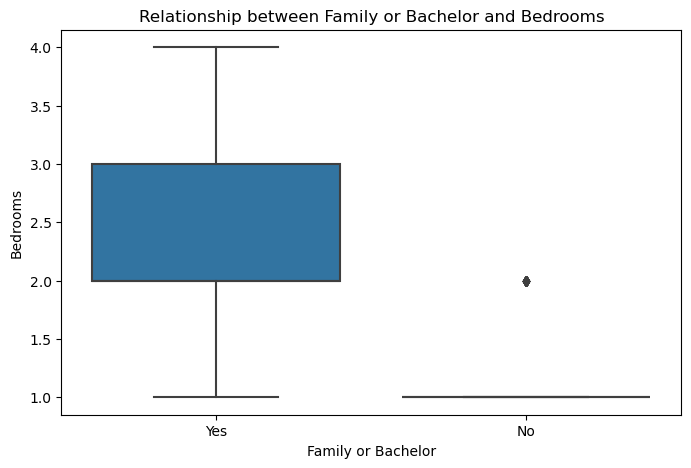

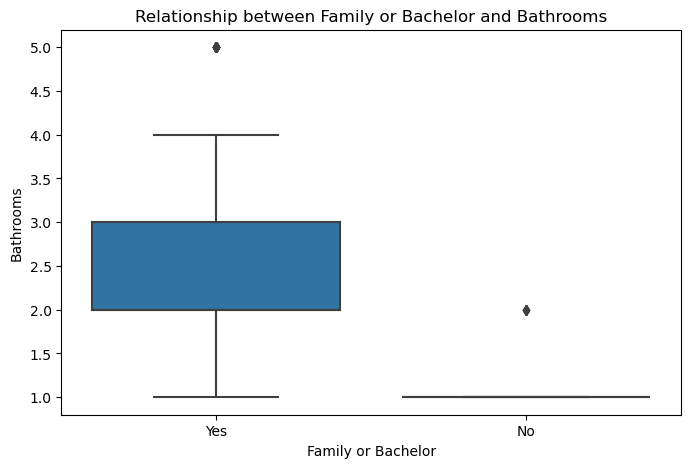

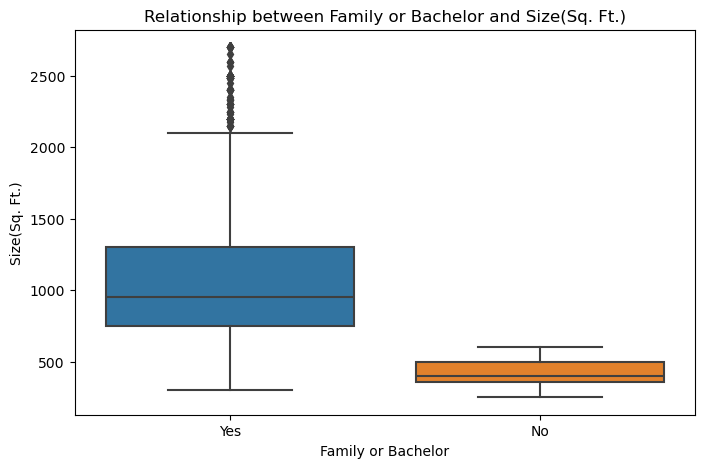

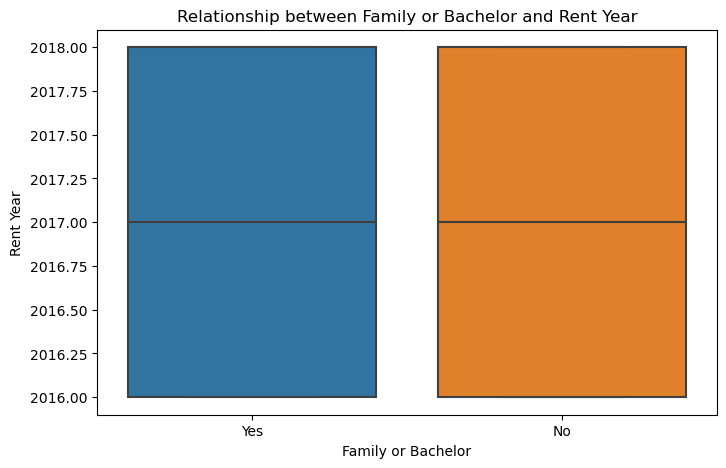

In [60]:
# Relationship between categorical and continuous variables
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

for cat_column in categorical_columns:
    for num_column in numeric_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=cat_column, y=num_column, data=df)
        plt.title(f'Relationship between {cat_column} and {num_column}')
        plt.show()

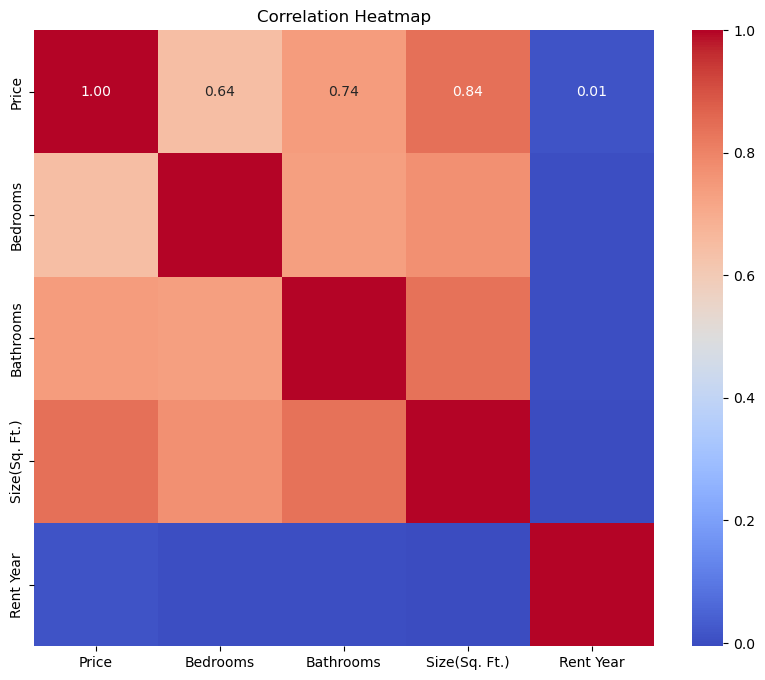

In [40]:
# Draw correlation using Pearson's Heat-map (Numeric Columns)
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

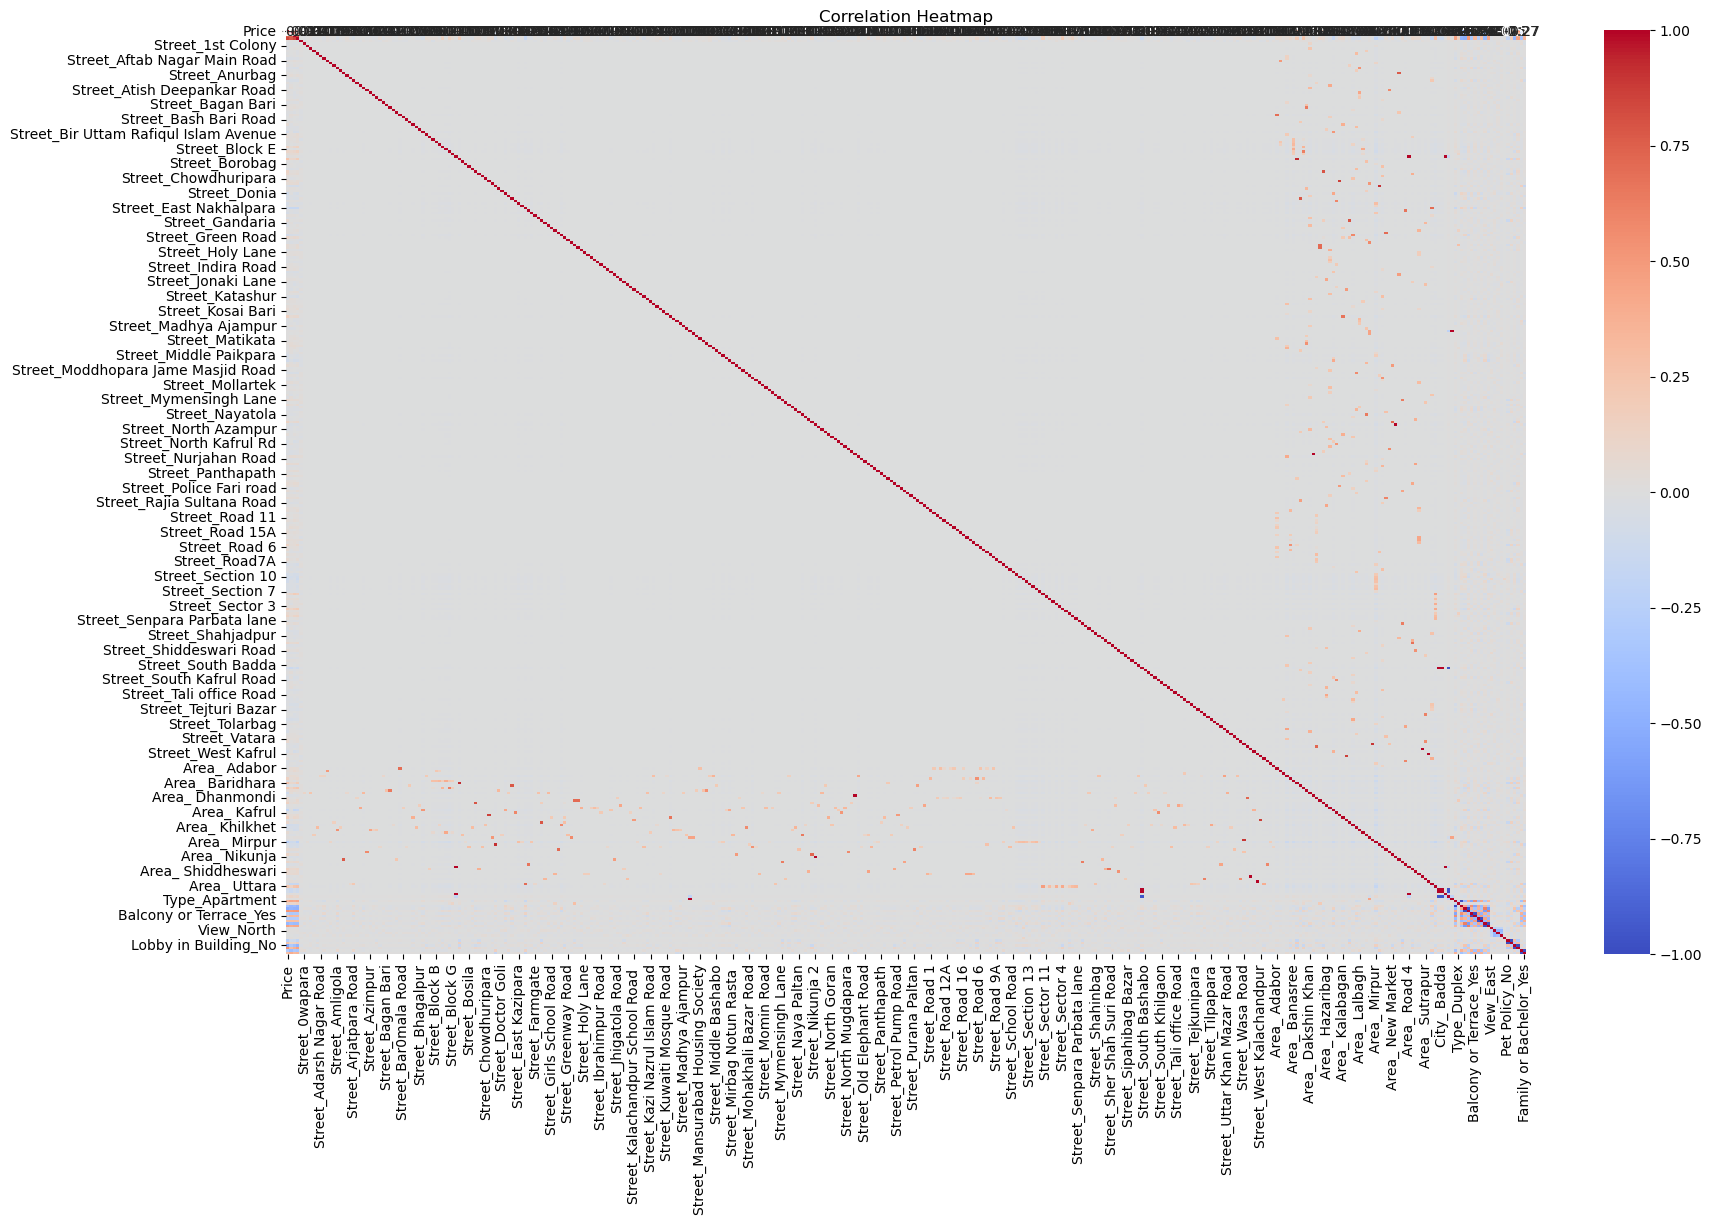

In [41]:
# Draw correlation using Pearson's Heat-map (All columns)
# Create a new DataFrame with one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df)
# Calculate correlation matrix
correlation_matrix = df_encoded.corr()
# Plot correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Model Validations

So the idea of this dataset is make a house price prediction value based on features we are going yo apply the linear model regression

In [50]:
df

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,10500,Section 11,Mirpur,Dhaka,Room,2,2,650,No,Yes,Yes,No,North,No,No,Yes,2018
3500,25000,Block G,Bashundhara R/A,Dhaka,Apartment,3,3,1500,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
3501,14000,Shahinbag,Tejgaon,Dhaka,Apartment,2,1,600,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
3502,40000,Block F,Lalmatia,Dhaka,Apartment,3,3,1650,Yes,Yes,Yes,Yes,South,No,Yes,Yes,2016


In [75]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [36]:
# Split data into train and test
#X = df.drop('Price', axis = 1)
X_features = ['Size(Sq. Ft.)','Bedrooms','Bathrooms']
X = df[X_features]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [66]:
# Scale/normalize the training data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print("Peak to Peak range by column in Raw X")   
print(np.ptp(X_train,axis=0))
print(f"Peak to Peak range by column in Normalized X")
print(np.ptp(X_norm,axis=0))

Peak to Peak range by column in Raw X
Size(Sq. Ft.)    2400
Bedrooms            3
Bathrooms           4
dtype: int64
Peak to Peak range by column in Normalized X
[5.61355357 4.53811264 4.58377875]


In [28]:
# Create and fit regression modal
sgdr = SGDRegressor(max_iter=1000, random_state=1)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(random_state=1)
number of iterations completed: 19, number of weight updates: 44100.0


In [67]:
# View parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [9029.25374124 -947.50519207  501.60568389], b:[18324.30518287]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [71]:
# Make predictions
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[18702.75044363 14856.23308052 21192.00803035  6692.20350636]
Target values 
1618    23000
3289    22000
820     17500
1930     9000
Name: Price, dtype: int64


InvalidIndexError: (slice(None, None, None), 0)

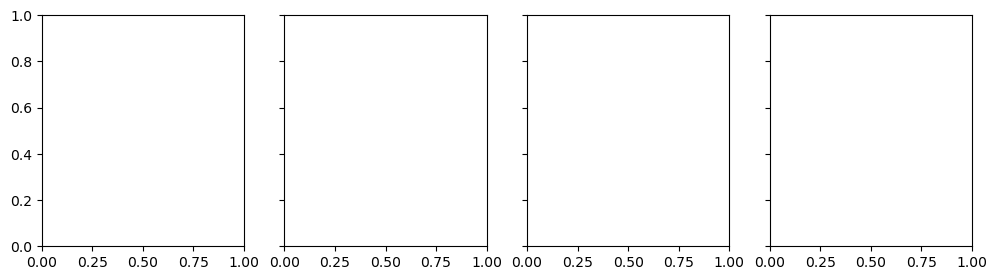

In [76]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target', c="#0000FF")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()